In [1]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger
import numpy as np

In [2]:
import numba

In [3]:
# prs = np.load('../data/processed/pr.npy')
# pr = np.transpose(pr, (0,2,1,3))
# pr = pr.reshape(1000,1000,40)
# pr = pr.reshape(1000000, 40)
h_3r = np.load('../data/processed/bflies_h_3.npy')
h_2r = np.load('../data/processed/bflies_h_2.npy')
h_1r = np.load('../data/processed/bflies_h_1.npy')
h_0r = np.load('../data/processed/bflies_h_0.npy')
h_3g = np.load('../data/processed/bflies_h_3g.npy')
h_2g = np.load('../data/processed/bflies_h_2g.npy')
h_1g = np.load('../data/processed/bflies_h_1g.npy')
h_0g = np.load('../data/processed/bflies_h_0g.npy')
# Z_real = np.concatenate([h_0, h_1, h_2, h_3],axis=1)
# Z_gan = np.concatenate([h_0g, h_1g, h_2g, h_3g],axis=1)

In [4]:
with np.load('../data/raw/butterflies.npz') as f:
        real_images, real_classes = f['x_train'], f['y_train']

In [5]:
with np.load('../data/raw/generated_butterflies.npz') as f:
        generated_images, generated_classes = f['x_train'], f['y_train']

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [7]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca();
    try:
        image = plt.imread(image);
    except TypeError:
        # Likely already an array...
        pass
    x, y = np.atleast_1d(x, y);
    artists = [];
    for i, (x0, y0) in enumerate(zip(x, y)):
        im = OffsetImage(image[i], zoom=zoom);
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False);
        artists.append(ax.add_artist(ab));
    ax.update_datalim(np.column_stack([x, y]));
    ax.autoscale();
    ax.grid(False);
    return artists

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

NameError: name 'generated_classes' is not defined

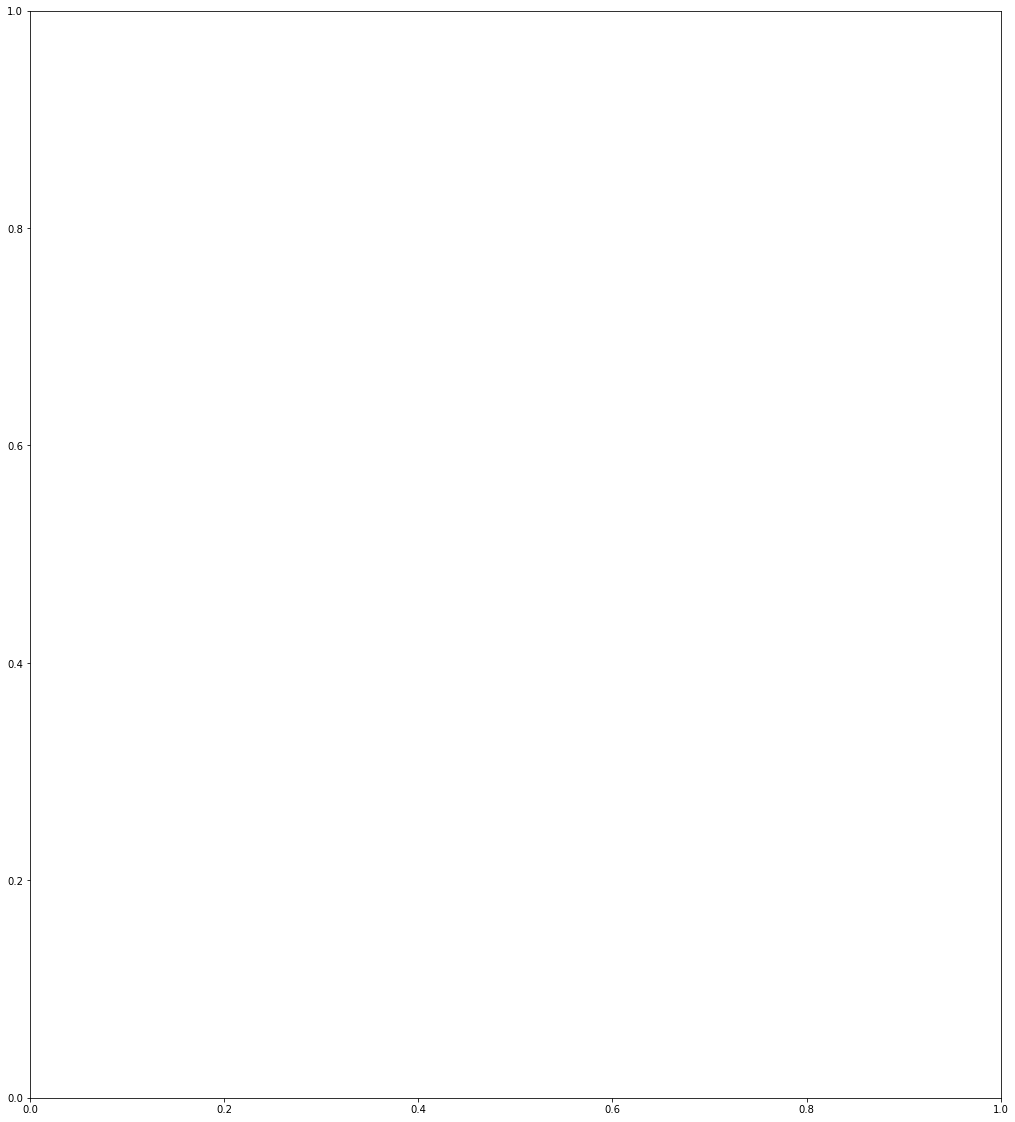

In [9]:
fig = plt.figure(figsize=(80,20))
plt.subplot(141)
h_0, h_1, h_2, h_3 = h_0r, h_1r, h_2r, h_3r
labels = real_classes
Z = h_0
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(142)
Z = h_1
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(143)
Z = h_2
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(144)
Z = h_3
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
fig.savefig('SuppREALFlies.pdf')

Iteration   50, KL divergence  2.8594, 50 iterations in 1.4122 sec
Iteration  100, KL divergence  2.8175, 50 iterations in 1.5075 sec
Iteration  150, KL divergence  2.8174, 50 iterations in 1.5125 sec
Iteration   50, KL divergence  2.1750, 50 iterations in 1.9206 sec
Iteration  100, KL divergence  2.2022, 50 iterations in 1.7312 sec
Iteration  150, KL divergence  2.2024, 50 iterations in 1.5119 sec
Iteration  200, KL divergence  2.2024, 50 iterations in 1.9160 sec


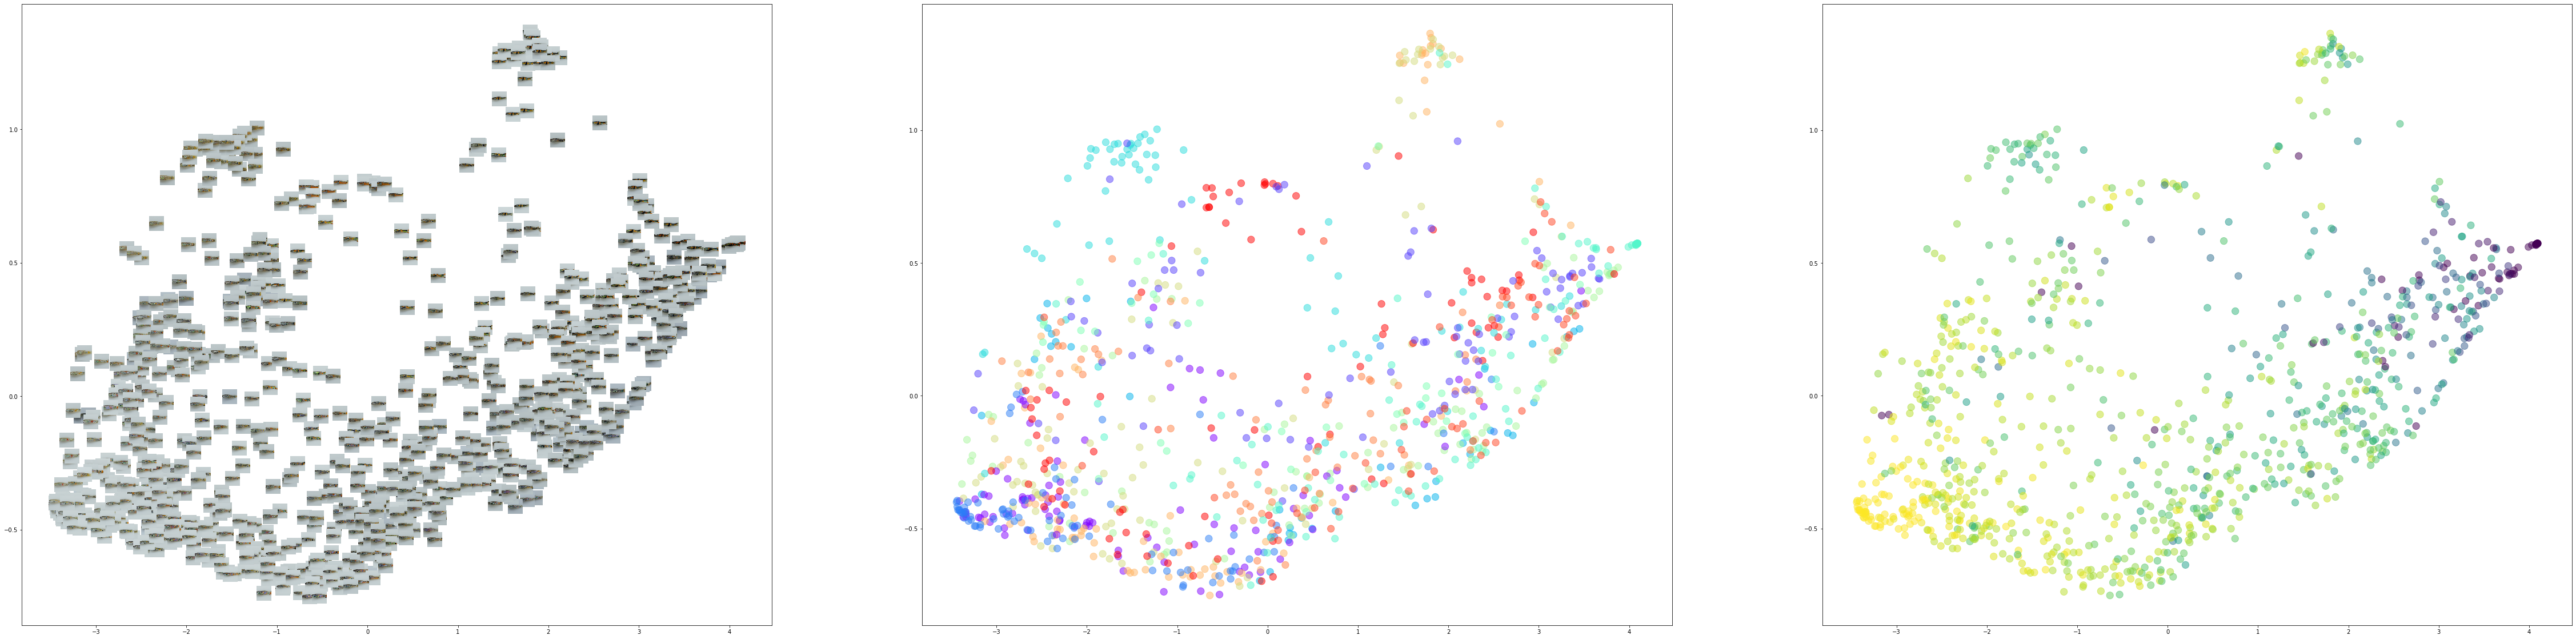

In [138]:
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)


plt.figure(figsize=(80,20))
plt.subplot(131)
imscatter(embedding[:, 0], embedding[:, 1], real_images, zoom=0.1);

plt.subplot(132)
Y = np.array(real_labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(133)
L = np.load('samplelikelihoods.npy')
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=L, vmax=np.percentile(L,95), vmin=np.percentile(L,5), cmap='viridis', s=150)
fig = plt.gcf()
fig.savefig('real_samples.pdf')

In [118]:
with np.load('/home/etheredge/Workspace/tcvae/data/gan_generated_guppies_fewer_samples.npz') as f:
    gan_labels =  f['y_train'].astype('int')

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Iteration   50, KL divergence  4.2080, 50 iterations in 5.4224 sec
Iteration  100, KL divergence  3.8339, 50 iterations in 6.1543 sec
Iteration  150, KL divergence  3.7027, 50 iterations in 6.0133 sec
Iteration  200, KL divergence  3.6309, 50 iterations in 6.2786 sec
Iteration  250, KL divergence  3.5783, 50 iterations in 5.8437 sec
Iteration   50, KL divergence  3.1314, 50 iterations in 5.8558 sec
Iteration  100, KL divergence  2.9844, 50 iterations in 5.8028 sec
Iteration  150, KL divergence  2.9218, 50 iterations in 6.2052 sec
Iteration  200, KL divergence  2.8868, 50 iterations in 6.0668 sec
Iteration  250, KL divergence  2.8636, 50 iterations in 5.5760 sec
Iteration  300, KL divergence  2.8470, 50 iterations in 5.7601 sec
Iteration  350, KL divergence  2.8341, 50 iterations in 6.0279 sec
Iteration  400, KL divergence  2.8237, 50 iterations in 5.9219 sec
Iteration  450, KL divergence  2.8153, 50 iterations in 5.8541 sec
Iteration  500, KL divergence  2.8085, 50 iterations in 5.8480

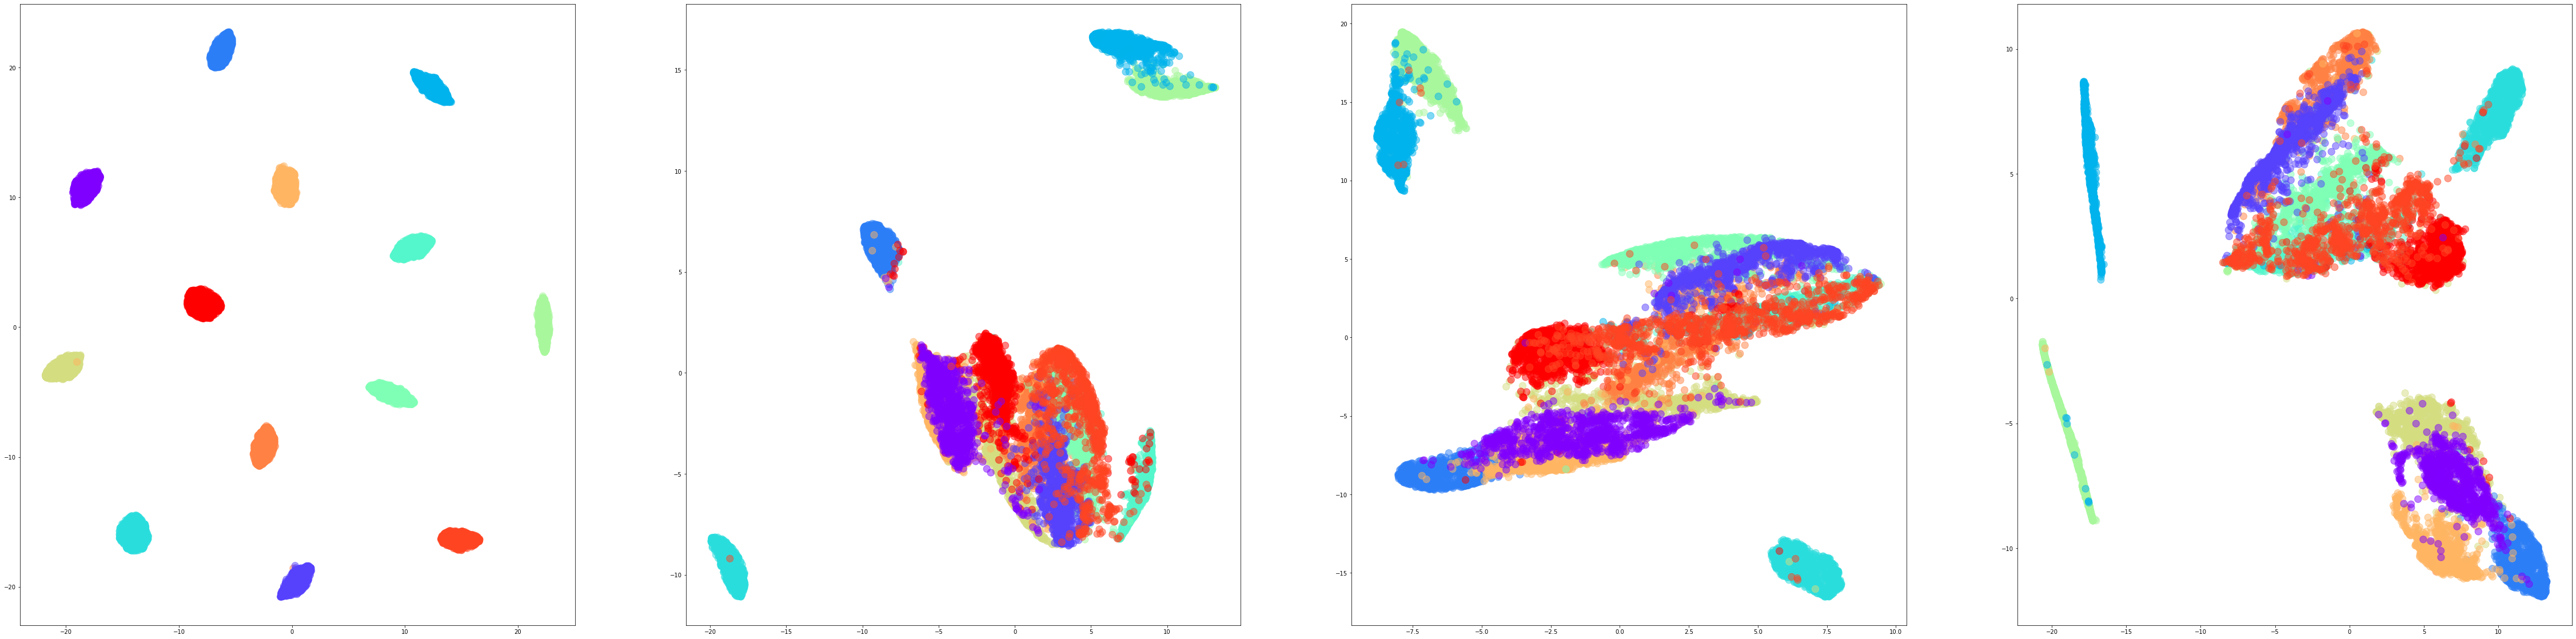

In [115]:
fig = plt.figure(figsize=(80,20))
plt.subplot(141)
h_0, h_1, h_2, h_3 = h_0g, h_1g, h_2g, h_3g
labels = gan_labels
Z = h_0
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(142)
Z = h_1
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(143)
Z = h_2
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
plt.subplot(144)
Z = h_3
embedding = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4).fit(Z)
Y = np.array(labels)
classnames, indices = np.unique(Y, return_inverse=True)
N = len(classnames)
cmap = plt.cm.rainbow
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,
        c=indices, cmap=cmap, norm=norm, s=150)
fig.savefig('SuppGAN_VAE.pdf')

In [97]:
embedding = embedded

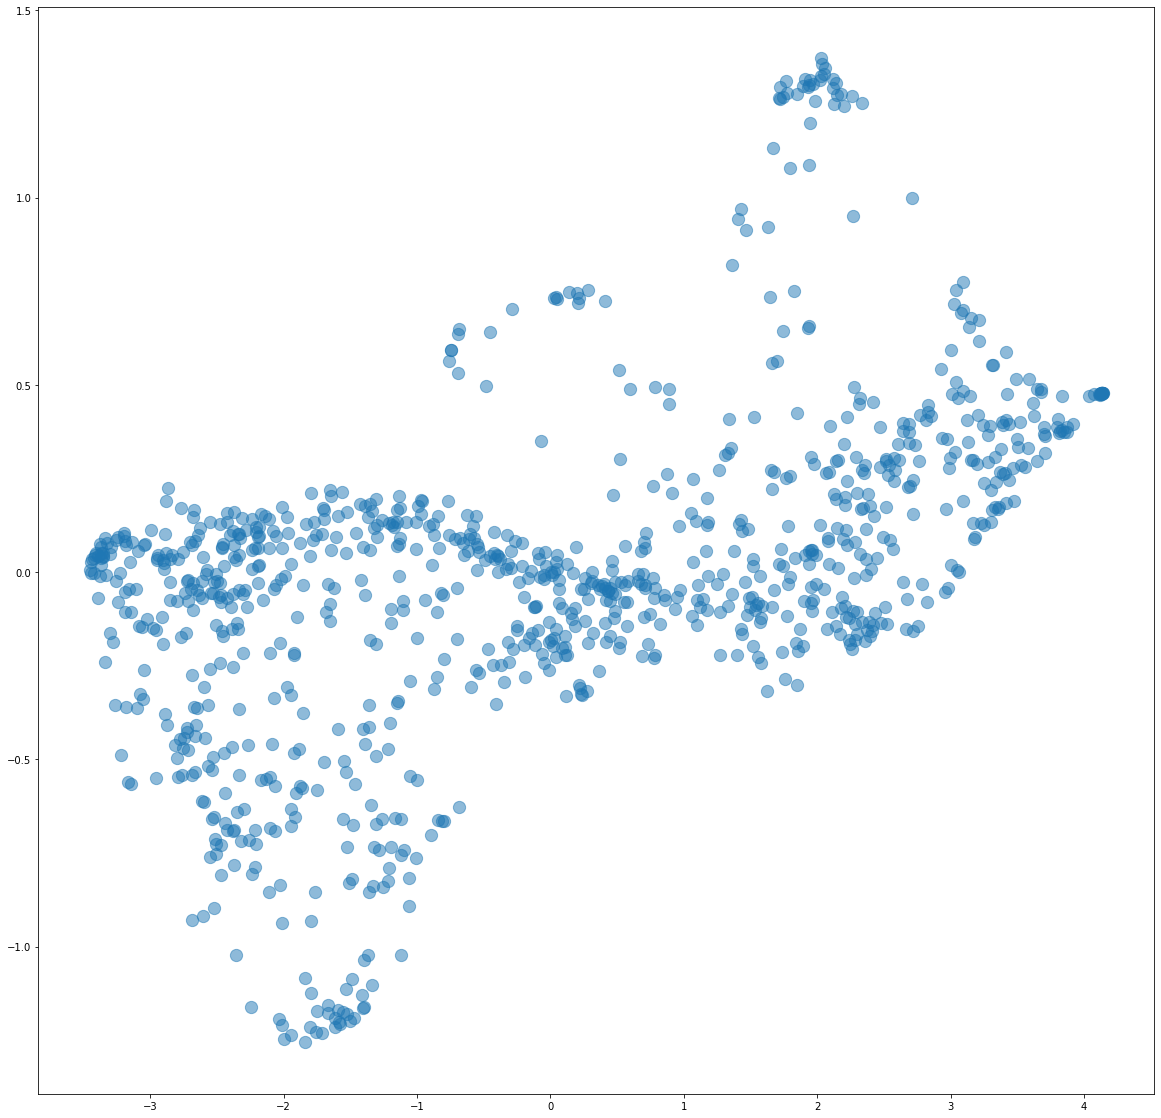

In [99]:
plt.figure(figsize=(20,20))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5,s=150)

In [4]:
# np.save('prembedding', embedding)
# embedding = np.load('realembedding.npy')

In [98]:
import matplotlib.pyplot as plt

In [6]:
for i in range(671,1000):
    print(i)
    strt = i * 1000
    stop = strt + 1000
    print(strt, stop)
    plt.clf()
    plt.figure(figsize=(20,20))
    strt = i*1000
    stp = strt + 1000
    h, x, y, p = plt.hist2d(
        embedding[strt:stop,0],
        embedding[strt:stop,1], 
        20,
        [[np.min(embedding[:,0]),np.max(embedding[:,0])],
         [np.min(embedding[:,1]),np.max(embedding[:,1])]],
        density=True,)
    plt.clf()
    plt.imshow(h, origin = "lower", interpolation = "gaussian")
    fig = plt.gcf()
    fig.savefig('../report/figures/images/evolve_latents/{:03d}.png'.format(i), dpi=300)
    plt.close()

671
671000 672000
672
672000 673000
673
673000 674000
674
674000 675000
675
675000 676000
676
676000 677000
677
677000 678000
678
678000 679000
679
679000 680000
680
680000 681000
681
681000 682000
682
682000 683000
683
683000 684000
684
684000 685000
685
685000 686000
686
686000 687000
687
687000 688000
688
688000 689000
689
689000 690000
690
690000 691000
691
691000 692000
692
692000 693000
693
693000 694000
694
694000 695000
695
695000 696000
696
696000 697000
697
697000 698000
698
698000 699000
699
699000 700000
700
700000 701000
701
701000 702000
702
702000 703000
703
703000 704000
704
704000 705000
705
705000 706000
706
706000 707000
707
707000 708000
708
708000 709000
709
709000 710000
710
710000 711000
711
711000 712000
712
712000 713000
713
713000 714000
714
714000 715000
715
715000 716000
716
716000 717000
717
717000 718000
718
718000 719000
719
719000 720000
720
720000 721000
721
721000 722000
722
722000 723000
723
723000 724000
724
724000 725000
725
725000 726000
726
726000

<Figure size 432x288 with 0 Axes>

In [3]:
h, x, y, p = plt.hist2d(
        embedding[strt:stop,0],
        embedding[strt:stop,1], 
        20,
        [[np.min(embedding[:,0]),np.max(embedding[:,0])],
         [np.min(embedding[:,1]),np.max(embedding[:,1])]],
        density=True,)
plt.imshow(h, origin = "lower", interpolation = "gaussian")

NameError: name 'plt' is not defined

In [7]:
import matplotlib.pyplot as plt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-40.18025625, -38.05559665, -35.93093705, -33.80627745,
        -31.68161785, -29.55695825, -27.43229865, -25.30763905,
        -23.18297945, -21.05831985, -18.93366025, -16.80900065,
        -14.68434105, -12.55968145, -10.43502185,  -8.31036225,
         -6.18570265,  -4.06104305,  -1.93638345,   0.18827615,
          2.31293575,   4.43759534,   6.56225494,   8.68691454,
         10.81157414,  12.93623374,  15.06089334,  17.18555294,
         19.31021254,  21.43487214,  23.55953174,  25.68419134,
         27.80885094,  29.93351054,  32.05817014,  34.18282974,
         36.30748934,  38.43214894,  40.55680854,  42.68146814,
         44.80612774,  46.93078734,  49.05544694,  51.18010654,
         53.30476614,  55.42942574,  57.5540853

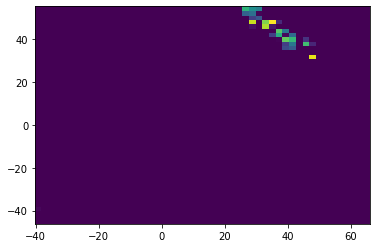

In [20]:
strt = 1000000
stop = -1
plt.hist2d(embedded[strt:stop, 0], embedded[strt:stop, 1],bins=50)